<a href="https://colab.research.google.com/github/iras-mpark/MLA1020/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
from einops import einsum

# Tensor Recap (p. 2)

### Operations on Vectors

In [73]:
x = np.array([0, 1, 10])
x

array([ 0,  1, 10])

In [74]:
# Identity: y[i] = x[i] for all i
y = einsum(x, "i -> i")
y

array([ 0,  1, 10])

In [75]:
# Sum: y += x[i] for all i
y = einsum(x, "i ->")
y

np.int64(11)

In [76]:
# Elementwise product: y[i] = x[i] * x[i] for all i
y = einsum(x, x, "i, i -> i")
y

array([  0,   1, 100])

In [77]:
# Dot product: y += x[i] * x[i] for all i
y = einsum(x, x, "i, i ->")
y

np.int64(101)

In [78]:
# Outer product: y[i][j] = x[i] * x[j] for all i, j
y = einsum(x, x, "i, j -> i j")
y

array([[  0,   0,   0],
       [  0,   1,  10],
       [  0,  10, 100]])

In [79]:
# Triple elementwise product: y[i] = x[i] * x[i] * x[i] for all i
y = einsum(x, x, x, "i, i, i -> i")
y

array([   0,    1, 1000])

In [80]:
# Triple outer product: y[i][j][k] = x[i] * x[j] * x[k] for all i, j, k
y = einsum(x, x, x, "i, j, k -> i j k")
y

array([[[   0,    0,    0],
        [   0,    0,    0],
        [   0,    0,    0]],

       [[   0,    0,    0],
        [   0,    1,   10],
        [   0,   10,  100]],

       [[   0,    0,    0],
        [   0,   10,  100],
        [   0,  100, 1000]]])

### Operations on matrices

In [81]:
x = np.array([1, 2, 3])
s = x.shape
s

(3,)

In [82]:
m = np.array([[0, 1, 2], [1, 10, 0]])
m

array([[ 0,  1,  2],
       [ 1, 10,  0]])

In [83]:
# Sum of all entries: y += m[i][j] for all i, j
y = einsum(m, "i j ->")
y

np.int64(14)

In [84]:
# Row sums: y[i] += m[i][j] for all i, j
y = einsum(m, "i j -> i")
y

array([ 3, 11])

In [85]:
# Column sums: y[j] += m[i][j] for all i, j
y = einsum(m, "i j -> j")
y

array([ 1, 11,  2])

In [86]:
# Transpose: y[j][i] = m[i][j] for all i, j
y = einsum(m, "i j -> j i")
y

array([[ 0,  1],
       [ 1, 10],
       [ 2,  0]])

In [87]:
# Matrix vector product: y[i] = m[i][j] * x[j] for all i, j
y = einsum(m, x, "i j, j -> i")
y

array([ 8, 21])

In [88]:
# Matrix-matrix product m m^T: y[i][j] = m[i][k] * m[j][k] for all i, j, k
y = einsum(m, m, "i k, j k -> i j")
y

array([[  5,  10],
       [ 10, 101]])

In [89]:
# Matrix-matrix product m^T m: y[i][j] = m[k][i] * m[k][j] for all i, j, k
y = einsum(m, m, "k i, k j -> i j")
y

array([[  1,  10,   0],
       [ 10, 101,   2],
       [  0,   2,   4]])

#Linear Regression (p. 5)

### Basic of linear regression

In [90]:
# Setup inital Data

x = np.array([[1, 2, 0], [0, -1, 1]])  # n x d 행렬  (input)
y = np.array([0, 3])  # 타깃(target)들의 n 벡터 (correct answer)
w = np.array([1, 0, 1])  # 가중치(weights)의 d 벡터 (weight)

In [91]:
# Basic Calculation

predictions = x @ w   # 곱셈 -> 예측값 n 벡터
residuals = predictions - y   # 원소별 뺄셈 -> 잔차(residual) n 벡터
losses = residuals ** 2  # 원소별 제곱
total_loss = np.sum(losses)  # 모든 원소 합

In [92]:
# Setup basic calculation to Function

def objective(w: np.ndarray) -> float:
    loss = np.sum((x @ w - y) ** 2)
    return loss

In [93]:
# Calculate loss for different Fixed Weights
loss = objective(np.array([1, 0, 1]))
print(loss)
loss = objective(np.array([1, 0, -1]))
print(loss)

# 궁극적인 목표는 objective(w)를 최소화하는 w를 찾는 것.
# 지금은: 고정된 w가 주어졌을 때, objective(w)의 값은 어떻게 될까? → 더 좋게 (작게) 만들려면 w를 어떻게 변경해야 할까?

5
17


# Example of Gradient (p. 5)

### 1D → 1D function

In [94]:
# Define 1D → 1D function
def f(x: float) -> float:
  return x ** 2

In [95]:
# -2 <= x <= 2의 범위 내에서 30개의 선형 샘플 추출 → 각 샘플에 대응되는 함수값 y 획득 가능
# []: list type
# {'x':x, 'y':y}: dictionary type
values = [{"x": x, "y": f(x)} for x in np.linspace(-2, 2, 30)]
values

[{'x': np.float64(-2.0), 'y': np.float64(4.0)},
 {'x': np.float64(-1.8620689655172413), 'y': np.float64(3.4673008323424495)},
 {'x': np.float64(-1.7241379310344827), 'y': np.float64(2.9726516052318663)},
 {'x': np.float64(-1.5862068965517242), 'y': np.float64(2.5160523186682524)},
 {'x': np.float64(-1.4482758620689655), 'y': np.float64(2.0975029726516055)},
 {'x': np.float64(-1.3103448275862069), 'y': np.float64(1.7170035671819261)},
 {'x': np.float64(-1.1724137931034484), 'y': np.float64(1.3745541022592156)},
 {'x': np.float64(-1.0344827586206897), 'y': np.float64(1.0701545778834722)},
 {'x': np.float64(-0.896551724137931), 'y': np.float64(0.8038049940546969)},
 {'x': np.float64(-0.7586206896551724), 'y': np.float64(0.5755053507728893)},
 {'x': np.float64(-0.6206896551724137), 'y': np.float64(0.38525564803804985)},
 {'x': np.float64(-0.48275862068965525), 'y': np.float64(0.23305588585017845)},
 {'x': np.float64(-0.3448275862068966), 'y': np.float64(0.11890606420927469)},
 {'x': np.flo

In [97]:
# x를 아주 조금 바꾸면 f(x)는 얼마나 바뀔까?
dx = 1e-4
x = 2
y = f(x)
new_y = f(x + dx)

print("y = ", y)
print("new_y = ", new_y)

# 변화량 dx에 대해 변화량 dy를 관찰.
dy = (new_y - y)
dy_dx = dy / dx
print("dy = ", dy)
print("dy_dx = ", dy_dx)


y =  4
new_y =  4.000400010000001
dy =  0.00040001000000078335
dy_dx =  4.0001000000078335


In [100]:
# dx -> 0이면 이것이 도함수(미분), 해석적으로 계산할 수도 있음:
def df_dx(x: float) -> float:
    return 2 * x

dy_dx = df_dx(x)
dy_dx
# 기하적으로 도함수는 x에서의 접선 기울기(slope)

4

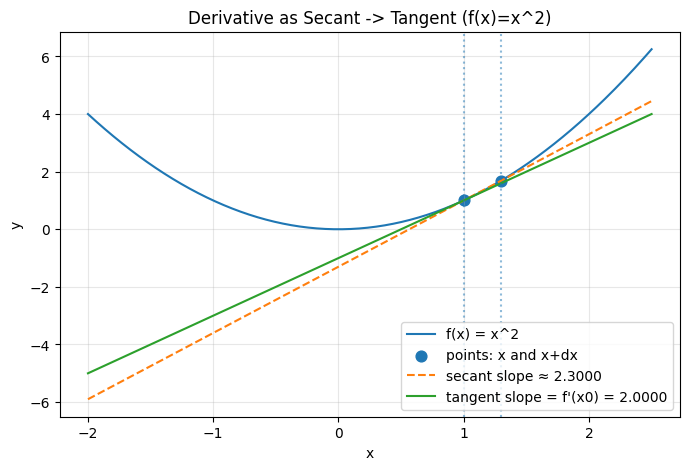

x0 = 1.0, dx = 0.3
(f(x0+dx)-f(x0))/dx = 2.300000
f'(x0) = 2.000000


In [103]:
import numpy as np
import matplotlib.pyplot as plt

# 함수와 도함수
def f(x):
    return x**2

def df_dx(x):
    return 2*x

# 기준점
x0 = 1.0
dx = 0.3   # 너무 작게 하면 그림에서 차이가 잘 안 보여서 시각화용으로는 0.2~0.5 정도가 좋아요

# 값 계산
y0 = f(x0)
x1 = x0 + dx
y1 = f(x1)

# 수치 미분(할선 기울기)
slope_secant = (y1 - y0) / dx

# 해석적 미분(접선 기울기)
slope_tangent = df_dx(x0)

# 접선/할선 직선 식
def line(x, x_ref, y_ref, m):
    return y_ref + m * (x - x_ref)

# 그래프용 x축
xs = np.linspace(-2, 2.5, 400)

# 그리기
plt.figure(figsize=(8, 5))
plt.plot(xs, f(xs), label='f(x) = x^2')

# 두 점 표시
plt.scatter([x0, x1], [y0, y1], s=60, label='points: x and x+dx')

# 할선 (x0와 x1를 지나는 직선)
plt.plot(xs, line(xs, x0, y0, slope_secant), '--',
         label=f'secant slope ≈ {slope_secant:.4f}')

# 접선 (x0에서의 접선)
plt.plot(xs, line(xs, x0, y0, slope_tangent),
         label=f'tangent slope = f\'(x0) = {slope_tangent:.4f}')

# 보조선
plt.axvline(x0, linestyle=':', alpha=0.5)
plt.axvline(x1, linestyle=':', alpha=0.5)

plt.title("Derivative as Secant -> Tangent (f(x)=x^2)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"x0 = {x0}, dx = {dx}")
print(f"(f(x0+dx)-f(x0))/dx = {slope_secant:.6f}")
print(f"f'(x0) = {slope_tangent:.6f}")

### 2D → 1D function

In [105]:
# 두 개의 스칼라 입력을 받아 스칼라를 출력하는 함수:
def f(x1: float, x2: float) -> float:
  return (x1 + x2) ** 2

y = f(1, 2)
y

9

In [110]:
# 각 입력에 대한 편미분을 해석적으로 계산:
def df_dx1(x1: float, x2: float) -> float:
  return 2 * (x1 + x2) * 1

def df_dx2(x1: float, x2: float) -> float:
  return 2 * (x1 + x2) * 1

dy_dx1 = df_dx1(1, 2)
dy_dx2 = df_dx2(1, 2)
print("dy_dx1 = ", dy_dx1)
print("dy_dx2 = ", dy_dx2)

# (1, 2)에서 (dy_x1, dy_x2) 방향으로 움직이면 f가 가장 크게 증가.
# (1, 2)에서 -(dy_x1, dy_x2) 방향으로 움직이면 f가 가장 크게 감소.

# 그래디언트는 편미분들을 모은 벡터:
#     ∇f = [df/dx[0], df/dx[1]]
print("∇f = ", np.array([dy_dx1, dy_dx2]))

dy_dx1 =  6
dy_dx2 =  6
∇f =  [6 6]


In [120]:
import numpy as np
import plotly.graph_objects as go

# -----------------------------
# 함수 / 그래디언트
# -----------------------------
def f(x1, x2):
    return (x1 + x2) ** 2

def grad_f(x1, x2):
    g = 2 * (x1 + x2)
    return np.array([g, g])  # [df/dx1, df/dx2]

# -----------------------------
# 메인 surface용 격자
# -----------------------------
x1 = np.linspace(-2, 4, 100)
x2 = np.linspace(-2, 4, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

# -----------------------------
# 기준점
# -----------------------------
x0, y0 = 1.0, 2.0
z0 = f(x0, y0)

g = grad_f(x0, y0)           # [6, 6]
g_norm = np.linalg.norm(g)   # ||grad||

# 입력 평면에서의 단위 상승 방향
u_xy = g / g_norm

# 표면 위 접선 방향 벡터 (상승/하강)
# z 방향 변화율 = directional derivative = ||grad||
v_up = np.array([u_xy[0], u_xy[1], g_norm])
v_down = -v_up

# 화살표 길이 크게 (더 잘 보이게)
arrow_scale = 0.75
v_up = v_up * arrow_scale
v_down = v_down * arrow_scale

# 시작점/끝점
p0 = np.array([x0, y0, z0])
p_up = p0 + v_up
p_down = p0 + v_down

# -----------------------------
# 접평면 (tangent plane) 패치
# z = f(x0,y0) + grad(x0,y0) · ([x1,x2] - [x0,y0])
# -----------------------------
plane_radius = 1.2  # 점 주변 범위
x1p = np.linspace(x0 - plane_radius, x0 + plane_radius, 30)
x2p = np.linspace(y0 - plane_radius, y0 + plane_radius, 30)
X1p, X2p = np.meshgrid(x1p, x2p)
Zp = z0 + g[0] * (X1p - x0) + g[1] * (X2p - y0)

# -----------------------------
# Plotly figure
# -----------------------------
fig = go.Figure()

# 1) 메인 곡면 (살짝 투명하게 해서 화살표/평면이 잘 보이게)
fig.add_trace(go.Surface(
    x=X1, y=X2, z=Z,
    opacity=0.72,
    showscale=False,
    colorscale="Greys",
    name="surface"
))

# 2) 접평면 (선명한 초록색 + 반투명)
fig.add_trace(go.Surface(
    x=X1p, y=X2p, z=Zp,
    surfacecolor=np.zeros_like(Zp),   # 단색 처리용
    colorscale=[[0, "#00CC66"], [1, "#00CC66"]],
    opacity=0.40,
    showscale=False,
    name="tangent plane"
))

# 3) 기준점 (더 크게/뚜렷하게)
fig.add_trace(go.Scatter3d(
    x=[x0], y=[y0], z=[z0],
    mode='markers',
    marker=dict(size=7, color='black'),
    name='point (1,2)'
))

# 4) 상승 방향 선 (빨강, 두껍게)
fig.add_trace(go.Scatter3d(
    x=[p0[0], p_up[0]],
    y=[p0[1], p_up[1]],
    z=[p0[2], p_up[2]],
    mode='lines',
    line=dict(color='red', width=10),
    name='steepest ascent (+∇f)'
))

# 5) 하강 방향 선 (파랑, 두껍게)
fig.add_trace(go.Scatter3d(
    x=[p0[0], p_down[0]],
    y=[p0[1], p_down[1]],
    z=[p0[2], p_down[2]],
    mode='lines',
    line=dict(color='blue', width=10),
    name='steepest descent (-∇f)'
))

# 6) 상승 방향 화살촉 (빨강 cone, 크게)
fig.add_trace(go.Cone(
    x=[p_up[0]], y=[p_up[1]], z=[p_up[2]],
    u=[v_up[0]], v=[v_up[1]], w=[v_up[2]],
    anchor="tip",
    sizemode="absolute",
    sizeref=0.9,  # 크게
    colorscale=[[0, "red"], [1, "red"]],
    showscale=False,
    name='ascent arrowhead'
))

# 7) 하강 방향 화살촉 (파랑 cone, 크게)
fig.add_trace(go.Cone(
    x=[p_down[0]], y=[p_down[1]], z=[p_down[2]],
    u=[v_down[0]], v=[v_down[1]], w=[v_down[2]],
    anchor="tip",
    sizemode="absolute",
    sizeref=0.9,  # 크게
    colorscale=[[0, "blue"], [1, "blue"]],
    showscale=False,
    name='descent arrowhead'
))

# 8) 보기 좋은 카메라/축
fig.update_layout(
    title="3D Surface + Gradient Arrows + Tangent Plane",
    scene=dict(
        xaxis_title="x1",
        yaxis_title="x2",
        zaxis_title="f(x1,x2)",
        camera=dict(eye=dict(x=1.7, y=1.5, z=1.0)),
        aspectmode="cube"
    ),
    width=950,
    height=700
)

fig.show()

# 정보 출력
print("point =", p0)
print("f(point) =", z0)
print("grad =", g)
print("||grad|| =", g_norm)
print("Tangent plane: z = f(x0,y0) + fx*(x-x0) + fy*(y-y0)")
print(f"             z = {z0:.2f} + {g[0]:.2f}(x-{x0}) + {g[1]:.2f}(y-{y0})")

point = [1. 2. 9.]
f(point) = 9.0
grad = [6. 6.]
||grad|| = 8.48528137423857
Tangent plane: z = f(x0,y0) + fx*(x-x0) + fy*(y-y0)
             z = 9.00 + 6.00(x-1.0) + 6.00(y-2.0)


### 1D~nD → 1D function (임의의 길이의 vector)